Axes3D(0.125,0.11;0.775x0.77)


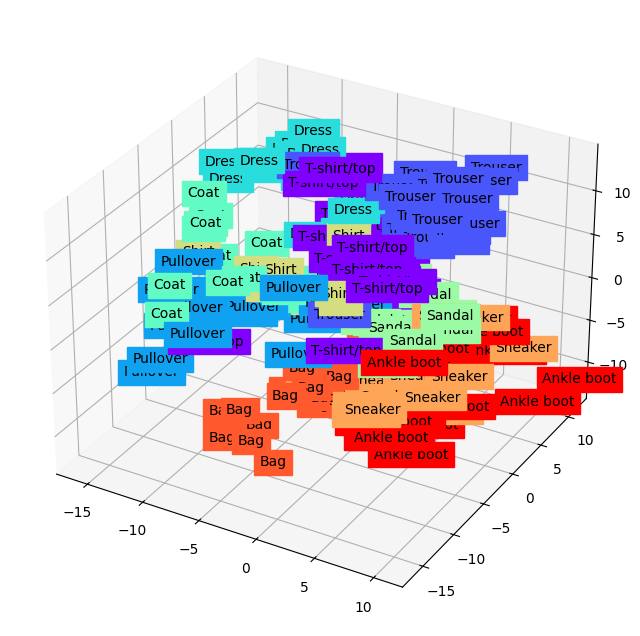

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from random import sample

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.models as models
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

from autoencoder import AutoEncoder

def visualize_latent_variable(autoencoder, trainset, device):
    """
    data를 encoding한 후, 각 차원을 numpy행렬로 변환하여 시각화한다.
    """
    
    classes = {
        0: 'T-shirt/top',
        1: 'Trouser',
        2: 'Pullover',
        3: 'Dress',
        4: 'Coat',
        5: 'Sandal',
        6: 'Shirt',
        7: 'Sneaker',
        8: 'Bag',
        9: 'Ankle boot'
    }
    
    fig = plt.figure(figsize=(10, 8))
    # ax = Axes3D(fig)
    ax = fig.add_subplot(111, projection='3d')
    
    view_data = trainset.data[:200].view(-1, 28*28)
    view_data = view_data.type(torch.FloatTensor) / 255.
    test_x = view_data.to(device)
    encoded_data, _ = autoencoder(test_x)
    encoded_data = encoded_data.to("cpu")
    
    # latent variable의 각 차원을 numpy 행렬로 변환한다.
    X = encoded_data[:, 0].detach().numpy()
    Y = encoded_data[:, 1].detach().numpy()
    Z = encoded_data[:, 2].detach().numpy()
    
    labels = trainset.targets[:200].numpy()
    
    for x, y, z, s in zip(X, Y, Z, labels):
        name = classes[s]
        color = cm.rainbow(int(255 * s / 9))
        ax.text(x, y, z, name, backgroundcolor=color)
    
    ax.set_xlim(X.min(), X.max())
    ax.set_ylim(Y.min(), Y.max())
    ax.set_zlim(Z.min(), Z.max())
    
    print(ax)


MODEL_SAVE_PATH = r"/workspace/Model_Implementation/GenerativeModel/AutoEncoder/autoencoder_models/autoencoder.pt"

autoencoder = AutoEncoder()
autoencoder.load_state_dict(torch.load(MODEL_SAVE_PATH))
autoencoder.eval()

trainset = datasets.FashionMNIST(
    root='./data/',
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

device = "cuda:5"
autoencoder.to(device)
    
visualize_latent_variable(autoencoder, trainset, device)


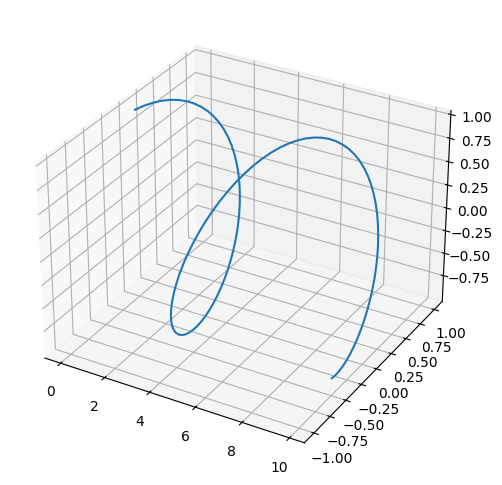

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

import numpy as np

x = np.arange(0, 10, 0.1)
y = np.sin(x)
z = np.cos(x)
ax.plot(x, y, z)